# Zonal Statistics API Examples

This notebook demonstrates two examples of retrieving data using the [Zonal Statistics](https://docs.climateengine.com/docs/build/html/zonal_statistics.html) family of endpoints.  This group of endpoints are used to generate bulk statistics of Climate Engine datasets over different geometries.

The CE API token is read as an environment variable named `CE_API_KEY`.

Climate Engine \
October 2021

In [1]:
from calendar import month_abbr
import json
import os
import requests

from folium import Map, GeoJson
import folium
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import pandas as pd

In [2]:
requests.packages.urllib3.disable_warnings(requests.packages.urllib3.exceptions.InsecureRequestWarning)

In [3]:
# Set root URL for API requests
root_url = 'https://geodata.dri.edu/'

In [4]:
# Authentication info
headers = {'Authorization': os.getenv('CE_API_KEY')}

## Pixel Counts - 180-day Standard Precipitation Index

In this example, the zonal_statistics/pixel_count/climate_engine_asset endpoint is used to collect zonal statistics of 180-day Standard Precipitation Index (SPI), a commonly used metric for hydrologic drought, across the state of California.  SPI pixel values are collected and binned to show the distribution of drought at a particular snapshot in time across the state.  This example captures drought from March - September (180 day period) for both 2020 and 2021 to show the drastic change in drought conditions across the state.

Here, we're using the readily available Climate Engine assets, subselecting the state of California for generating the zonal stats.  The full list of built-in Climate Engine assets is available [here](https://docs.climateengine.com/docs/build/html/climate_engine_assets.html).

Detailed documentation for the zonal_statistics/pixel_count/climate_engine_asset endpoint found [here](https://docs.climateengine.com/docs/build/html/zonal_statistics.html#rst-zonal-statistics-pixel-count-climate-engine-asset).

In [5]:
endpoint = 'zonal_statistics/pixel_count/climate_engine_asset'

In [6]:
# Set up params dict for API call for 2020 data
params = {
    'dataset': 'GRIDMET_DROUGHT',
    'variable': 'spi180d',
    'bins': '[-2.5, -2, -1.5, -1, -0.5, 0.5, 1, 1.5, 2, 2.5]',
    'end_date': '2020-09-02',
    'region': 'states',
    'sub_choices': '["California"]',
    'filter_by': 'Name'
}

In [7]:
# Send API request
r = requests.get(root_url + endpoint, params=params, headers=headers, verify=False)
spi_2020_response = r.json()

In [8]:
# Extract data and build pandas dataframe
variable_name = params["variable"]
spi_2020_df = pd.DataFrame(columns = ['Name', 'Date', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4'])

for name in spi_2020_response:
    for date in name:
        a_subset = {key: date[key] for key in ['Name', 'Date']}
        b_subset = date[variable_name]
        a_subset.update(b_subset)
        df = pd.DataFrame(a_subset, index=[0])
        spi_2020_df = spi_2020_df.append(df)
    
# Convert pixel counts to percent values
total_2020 = np.array(spi_2020_df.iloc[0,2:12].dropna()).sum()
percents_2020 = np.array(spi_2020_df.iloc[0,2:12]) / total_2020 * 100

In [9]:
# Set up params dict for API call for 2021 data
params = {
    'dataset': 'GRIDMET_DROUGHT',
    'variable': 'spi180d',
    'bins': '[-2.5, -2, -1.5, -1, -0.5, 0.5, 1, 1.5, 2, 2.5]',
    'end_date': '2021-09-02',
    'region': 'states',
    'sub_choices': '["California"]',
    'filter_by': 'Name'
}

In [10]:
# Send API request
r = requests.get(root_url + endpoint, params=params, headers=headers, verify=False)
spi_2021_response = r.json()

In [11]:
# Extract data and build pandas dataframe
variable_name = params["variable"]
spi_2021_df = pd.DataFrame(columns = ['Name', 'Date', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4'])

for name in spi_2021_response:
    for date in name:
        a_subset = {key: date[key] for key in ['Name', 'Date']}
        b_subset = date[variable_name]
        a_subset.update(b_subset)
        df = pd.DataFrame(a_subset, index=[0])
        spi_2021_df = spi_2021_df.append(df)
    
# Convert pixel counts to percent values
total_2021 = np.array(spi_2021_df.iloc[0,2:12].dropna()).sum()
percents_2021 = np.array(spi_2021_df.iloc[0,2:12]) / total_2021 * 100

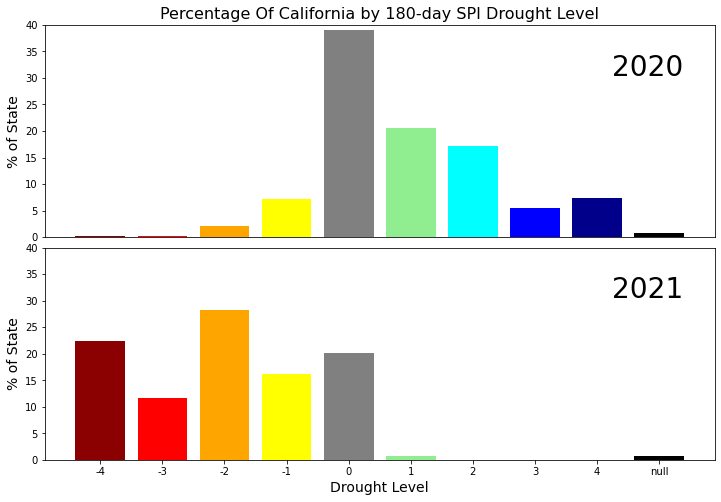

In [12]:
# Plot the drought distributions together for 2020 and 2021
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
names = np.array(spi_2020_df.iloc[0,2:12].keys())
colors = ['darkred', 'red', 'orange', 'yellow', 'grey','lightgreen','cyan', 'blue', 'darkblue', 'black']
plt.bar(names, percents_2020, color=colors)
plt.xticks([],[])
plt.ylabel('% of State', fontsize=14)
plt.ylim([0,40])
plt.text(0.9, 0.8, '2020', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=28)
plt.title('Percentage Of California by 180-day SPI Drought Level', fontsize=16)
plt.subplot(2,1,2)
plt.bar(names, percents_2021, color=colors)
plt.ylabel('% of State', fontsize=14)
plt.xlabel('Drought Level', fontsize=14)
plt.ylim([0,40])
plt.text(0.9, 0.8, '2021', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=28)
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.show()

## Values - Aridity Index

In this example, the zonal_statistics/values/climate_engine_asset endpoint is used to calculate aridity index (AI) for two hydrologic sub-basins in the US, one in the East and one in the West.  Smaller aridity index values indicate regions which suffer from a deficit of available water.  Zonal statistics of precipitation and potential evapotranspiration are collected and used to derive the aridity index.  This example plots the aridity index from 2000-2018 using daily precipitation and potential evapotranspiration data from the gridMET dataset.

Here, we're using the readily available Climate Engine assets, subselecting the state of California for generating the zonal stats.  The full list of built-in Climate Engine assets is available [here](https://docs.climateengine.com/docs/build/html/climate_engine_assets.html).

Detailed documentation for the zonal_statistics/values/climate_engine_asset endpoint found [here](https://docs.climateengine.com/docs/build/html/zonal_statistics.html#zonal-statistics-values-climate-engine-asset).

In [13]:
endpoint = 'zonal_statistics/values/climate_engine_asset'

In [14]:
# Load in the basin GeoJSON files for visualization
east_poly_json = r'./eastern_huc8.geojson'
with open(east_poly_json, 'r') as f:
    east_polygon_dict = json.load(f)
east_polygon_coords = east_polygon_dict['features'][0]['geometry']['coordinates']

west_poly_json = r'./western_huc8.geojson'
with open(west_poly_json, 'r') as f:
    west_polygon_dict = json.load(f)
west_polygon_coords = west_polygon_dict['features'][0]['geometry']['coordinates']

In [15]:
# Map basin outlines
m = Map(
    width='100%', 
    height='100%',
    location=[37.0902, -105.7129],
    zoom_start=4,
    tiles=None
)

# Add satellite basemap
tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)


style1 = {'fillColor': 'None', 'color': '#ff00ff'}
style2 = {'fillColor': 'None', 'color': '#00FFFFFF'}
GeoJson(data=east_polygon_dict, name='Eastern HUC8', style_function=lambda x:style1).add_to(m)
GeoJson(data=west_polygon_dict, name='Western HUC8', style_function=lambda x:style2).add_to(m)

m.add_child(folium.LayerControl())

m

In [16]:
# Query to get annual precipitation and ETo totals
# Each year is queried separately and then converted into a dataframe
year_list = range(2000, 2019)
precip_df = pd.DataFrame()
eto_df = pd.DataFrame()
for year in year_list:
    # Set up parameters for precipitation API call
    precip_params = {
        'dataset': 'G',
        'variable': 'pr',
        'temporal_statistic': 'total',
        'start_date': f'{str(year)}-01-01',
        'end_date': f'{str(year)}-12-31',
        'region': 'huc8',
        'area_reducer': 'mean',
        'sub_choices': '["Upper Stanislaus", "Upper Gasconade"]',
        'filter_by': 'Name'   
    }

    # Send request to the API
    r = requests.get(root_url + endpoint, params=precip_params, headers=headers, verify=False)
    precip_response = r.json()

    # Convert to dataframe
    for ts_id in precip_response:
        df = pd.DataFrame(ts_id)
        df['year'] = year
        precip_df = precip_df.append(df)

    # Set up parameters for potential evapotranspiration API call
    eto_params = {
        'dataset': 'G',
        'variable': 'eto',
        'temporal_statistic': 'total',
        'start_date': f'{str(year)}-01-01',
        'end_date': f'{str(year)}-12-31',
        'region': 'huc8',
        'area_reducer': 'mean',
        'sub_choices': '["Upper Stanislaus", "Upper Gasconade"]',
        'filter_by': 'Name'   
    }

    # Send request to the API
    r = requests.get(root_url + endpoint, params=eto_params, headers=headers, verify=False)
    eto_response = r.json()

    # Convert to dataframe
    for ts_id in eto_response:
        df = pd.DataFrame(ts_id)
        df['year'] = year
        eto_df = eto_df.append(df)
        

In [17]:
# Combine datasets and calculate the aridity index
final_df = pd.merge(precip_df, eto_df, on=['Name','year'], how='left')[['Name', 'pr (mm)', 'eto (mm)', 'year']]
final_df['aridity_index'] = final_df['pr (mm)']/final_df['eto (mm)']

# Separate values by region (using sub-basin name)
west_df = final_df.loc[final_df.Name == "Upper Stanislaus"]
east_df = final_df.loc[final_df.Name == "Upper Gasconade"]

# Calculate mean aridity index values
west_mean_aridity = west_df['pr (mm)'].sum()/ west_df['eto (mm)'].sum()
east_mean_aridity = east_df['pr (mm)'].sum()/ east_df['eto (mm)'].sum()

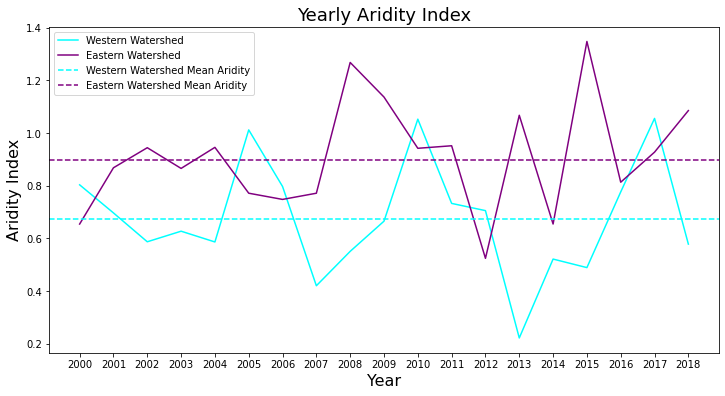

In [18]:
# Plot AI values (yearly and means together)
plt.figure(figsize=(12,6))
west_color = 'cyan'
east_color = 'purple'
plt.plot(west_df["year"], west_df["aridity_index"], label="Western Watershed", color=west_color)
plt.plot(east_df["year"], east_df["aridity_index"], label="Eastern Watershed", color=east_color)
plt.axhline(y=west_mean_aridity, color=west_color, linestyle='--', label="Western Watershed Mean Aridity")
plt.axhline(y=east_mean_aridity, color=east_color, linestyle='--', label="Eastern Watershed Mean Aridity")
plt.legend()
plt.title(f'Yearly Aridity Index', fontsize=18)
plt.xticks(ticks=range(2000,2019))
plt.xlabel('Year', fontsize=16)
plt.ylabel('Aridity Index', fontsize=16)
plt.show()